<a href="https://colab.research.google.com/github/mahdi13830510/TensorFlow_NLP/blob/main/Getting_Started_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np

Most recipes will folllow this outline:

1- **Import or generate datasets:** All of our machine-learining algorithms will depend on datasets. In this book, we will either generate data or use an outside source of datasets. Sometimes it is better to rely on generated data because we wil just want to know the expected outcome. Most of the time, we will access public datasets for given recipe and the details.

2- **Transform and normalize data:** Normally, input datasets do not come in the shape TensorFlow would expect so we need to transform TensorFlow them to the accepted shape. The data is usually not in the correct dimension or type that our algorithms expect. We will have to transform our data before we can use it. Most algorithms also expect normalized data and we will do this here as well. TensorFlow has built-in functions that can nomalize the data for you as follow:
```
data = tr.nn.batch_norm_with_global_normalization(...)
```
3- **Partition datasets into train, test, and validation sets:** We generally want to test our algorithms on different sets that we have trained on. Also, many algorithms require hyperparameter tuning, so we set aside a validation set for determining the best set of hyperparameters.

3- **Set algorithms parameters(hyperparameters):** Our algorithms usually have a set of parameters that we hold constant throughout the procedure. For example, this can be the number of iterations, the learning rate, other fixed parameters of our choosing. It is considered good form to initialize these together so the reader or user can easily find them, as follows:
```
learning_rate = 0.01
batch_size = 100
iterations = 1000
```
5- **Initialize variables and placeholders:** TensorFlow depends on knowing what it can and cannot modify. TensorFlow will modify/adjust the variables and weight/bias during optimization to minimize a *loss* function. To accomplish this, we feed in data through placeholders. We need to initialize both of these variables and placeholders with size and type, so that TensorFlow knows what to expect. TensorFlow also needs to know the type of data to expect: for most of this book, we will use *float32*. TensorFlow also provides *float64* and *float16*. Note that the more bytes used for precision results in slower algorithms, but the less we use results in less precision. See the following code:
```
a_var = tf.constant(42)
x_input = tf.placeholder(tf.float32, [None, input_size])
y_input = tf.placeholder(tf.float32, [None, num_classes])
```
6- **Define the model structure:** After we have the data, and have initialized our variables and placeholders, we have to define the model. This is done by building a computational graph. TensorFlow chooses what operations and values must be teh variables and placeholders to arrive at our model outcomes. Our model for this example will be a linear model:
```
y_pred = tf.add(tf.mul(x_input, weight_matrix), b_matrix)
```
7- **Declare the loss function:** After defining the model, we must be able to evaluate the output. This is where we declare the *loss* function. The *loss* function is very important as it tells us how far off our predeictions are from the actual values. for example:
```
loss = tf.reduce_mean(tf.square(y_actual - y_pred))
```
8- ** Initialize and train the model:** Now that we have everything in place, we need to create an isntance of our graph, feed in the data through the placeholders, and let TensorFlow change the variables to better predict our training data. Here is one way to initialize the computational graph:
```
with tf.session(graph=graph) as session:
  ...
  session.run(...)
  ...
```
Note that we can also initiate our graph with:
```
session = tf.Session(graph=graph)
session.run(...)
```
9- **Evaluate the model:** Oncee we have built and trained the model, we should evaluate the model by looking at how well it does with new data through some specified criteria. We evaluate on the train and test set and these evaluations will allow us to see if the model id underfit or overfit. We will address these in later recipes.

10- **Tune hyperparameters:** Most of the times, we will want to go back and change some of the hyperparameters, based on the model performance. We then repeat the previous steps with diffrent hyperparameters and evaluate the model on the validation set.

11_ **Deploy/predict new outcomes:** It is also important to know how to make predictions on new. unseen, data. We can do this with all of our models, once we have them trained.


# Declaring Tensors

Tensors are the primary data structure that TensorFlow uses to operate on the computational graph. We can declare these tensors as variables and or feed them in as placeholders. First we must know how to create tensors.
When we create a tensor and declare it to be a variable, TensorFlow creates several graph structures in our computation graph. It is also important to point out that just by creating a tensor, TensorFlow is not adding anything to the computational graph.

Here we will cover the main ways to create tensors in TensorFlow:

##1- Fixed tensors:

In [ ]:
# Create a zero filled tensor. Use the following:
zero_tsr = tf.zeros([2, 2])
print(zero_tsr)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [ ]:
# Create a one filled tensor. Use the following:
ones_tsr = tf.ones([2, 2])
print(ones_tsr)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [ ]:
# Create a constant filled tensor. Use the following:
filled_tsr = tf.fill([2, 2], 42)
print(filled_tsr)

tf.Tensor(
[[42 42]
 [42 42]], shape=(2, 2), dtype=int32)


In [ ]:
# Create a tensor out of an existing constant. Use the following:
constant_tsr = tf.constant([1, 2, 3])
print(constant_tsr)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)



Note
---
Note that the *tf.constant()* function can be used to broadcast a value into an array, mimicking the bahavior of *tf.fill()* by writing *tf.constant(42, [row_dim, col_dim])*

##2- Tensors of similar shape:

In [ ]:
# We can also initialize variables based on the shape of other tensors:
zeros_similar = tf.zeros_like(constant_tsr)
ones_similar = tf.ones_like(constant_tsr)
print(f"zeros_similar: {zeros_similar}\n" +
      f"ones_similar: {ones_similar}")

zeros_similar: [0 0 0]
ones_similar: [1 1 1]



Note
---
Note, that since these tensors depend on prior tensors, we must initialize them in oreder. Attempting to initialize all the tensors all at once willwould result in an error

##3- Sequence tensors:

In [ ]:
"""
TensorFlow allows us to specify tensors that contain defined intervals.
The folloing functions bahave very similarly to the range() outputs and
numpy's linespace() outputs. See the following function:
"""
linear_tsr = tf.linspace(0, 1, 3)
print(linear_tsr)

tf.Tensor([0.  0.5 1. ], shape=(3,), dtype=float64)


In [ ]:
"""
Note that this function includes the specfified stop value. See the
following function:
"""
integer_seq_tsr = tf.range(start=6, limit=15, delta=3)
print(integer_seq_tsr)
# Note that this function does not include the limit value

tf.Tensor([ 6  9 12], shape=(3,), dtype=int32)


##4- Random tensors:

In [ ]:
"""
Note that this random uniform distribution draws from the interval
that includes the minval but not the maxval
(minval <= x < maxval)
"""
# The following generatedd random numbers are from a unifrom distribution:
randunif_tsr = tf.random.uniform([2, 2], minval=0, maxval=1)
print(randunif_tsr)

tf.Tensor(
[[0.3221202  0.07705283]
 [0.5458449  0.8150064 ]], shape=(2, 2), dtype=float32)


In [ ]:
# To get a tensor with random draws from a normal distribution, as follows:
randnorm_tsr = tf.random.normal([2, 2], mean=0.0, stddev=1.0)
print(randnorm_tsr)

tf.Tensor(
[[-0.3281341  -1.2613165 ]
 [-0.41676232  0.5077727 ]], shape=(2, 2), dtype=float32)


In [ ]:
"""
There are also times when we wish to generate normal random values
that are assured within certain bounds.
The truncated_normal() function always picks normal values within
two standard deviations of the specified mean. See following :
"""
runcnorm_tsr = tf.random.truncated_normal([2, 2], mean=0.0, stddev=1.0)
print(runcnorm_tsr)

tf.Tensor(
[[-0.5959731  -0.19434686]
 [ 0.70934916  1.0583062 ]], shape=(2, 2), dtype=float32)


In [ ]:
"""
We might also be interested in randomizing entries of arrays.
To accomplish this, there are one functions that help us:
random_shuffle() See as following:
"""
shuffled_output = tf.random.shuffle(runcnorm_tsr)
print(shuffled_output)


Once we have decided on how to create the tensors, then we may also create the correspondeing variables by wrapping the tensor in the *Variable()* function, as follows:
```
my_var = tf.Variable(tf.zeros([row_dim, col_dim]))
```
We are not limited to the built_in functions. We can convert any *numpy* array to a Python list, or constant to a tensor using the function *convert_to_tensor()* . Note that this function also accepts tensors as an input in case we wish to generalize a computation inside a function.

# Using Placeholders and Variables
Placeholders and variables are key tools for using computational graphs in TensorFlow. We must understand the difference and when to best use them to our advantage.

One of the most important distinctions to make with the data is whether it is a placeholder or a variable. Variables are the parameters of the algorithm and TensorFlow keeps track of how to change these to optimize the algorithms. Placeholders are objects that allow you to feed in data of a specific type and shape and depend on the results of the computational graph, such as the expected outcome of a computation.

The main way to create a vairable is by using *Variable()* function, which takes a tensor as an input and outputs a variable. This is the declaration and we still need to initialize the variable. Initializing is what puts the varaible with the corresponding methods on the computational graph. Here is an example of creating and initializing a variable:

In [ ]:
my_var = tf.Variable(tf.zeros([2, 3]))
sess = tf.compat.v1.Session()
initialize_op = tf.compat.v1.global_variables_initializer()
sess.run(initialize_op)


Placeholders are just holding the position for data to be fed into the graph. Placeholders get data from *feed_dict* argument in the session. To put a placeholder in the graph, we must perform at least one operation on the placeholder. We initialize the graph, declare *x* to be a placeholder, and define *y* as the identity operation on *x*, which just returns *x*. We then create data to feed into the *x* placeholder and run the identity operation. It is worth noting that TensorFlow will not return a self-referenced placeholder in the feed dictionary. The code is shown here and the resulting graph is shwon in the next session:

In [ ]:
sess = tf.compat.v1.Session()
x = tf.compat.v1.placeholder(tf.float32, shape=[2, 2])
y = tf.identity(x)
x_vals = np.random.rand(2, 2)
sess.run(y, feed_dict={x: x_vals})
# Note that sess.run(x, feed_dict={x: x_vals}) will result in a self-referencing error

array([[0.04594006, 0.85711676],
       [0.67188704, 0.5033806 ]], dtype=float32)

The computational graph of initializing a variable as a tensor of zeros is shown in the following figure:
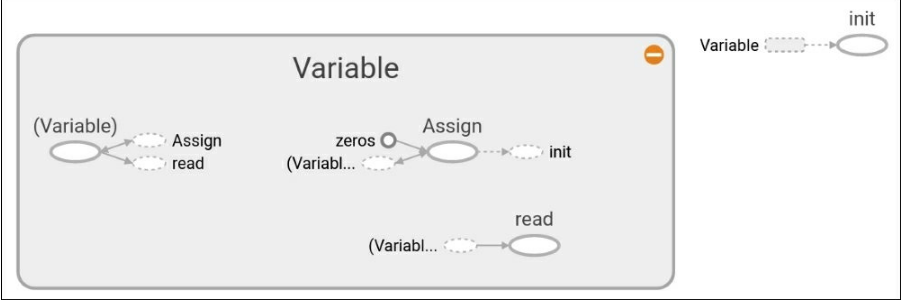


In *Figure 1*, we can see what the computational graph looks like in detail with justt one variable, initialized to all zeros. The grey shaded region is a very detailed view of the operations and constantss involved. The main computational graph with less detail is the smaller graph outside of the grey region in the uppper right corner. For more details on creating and visualizing graphs.

Similarly, the computational graph of feeding a *numpy* array into a placeholder can be seen in the following figure:

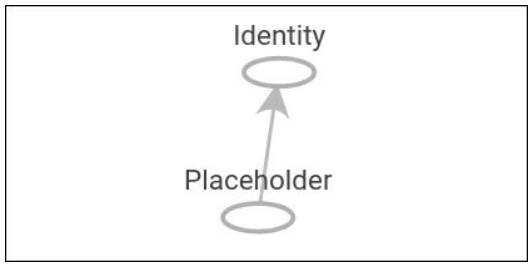

*Figure 2*: Here is the computational graph of a placeholder initialized. The grey shaded region is a very detailed view of the operations and constants involved. The main computational graph with less detail is the smaller graph outside of the grey region in the upper right.

There's more...
---
During the run of the computational graph, we have to tell TensorFlow when to initialize ther variables we have created. TensorFlow must be informed about when it can initialize the variables. While each variable has an *initializer* method, the most common way to do this is to use the *helper* function, which is *global_variables_initializer()*. This function creates an operation in the graph that initailizes all the variables we have created, as follows:

```
initializer_op = tf.global_variables_initializer()
```

But if we want to initialize a variable based on the results of initializing another variable, we have to initialize variables in the order we wantt, as follows:

In [6]:
tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.Session()
first_var = tf.Variable(tf.zeros([2, 3]))
sess.run(first_var.initializer)
second_var = tf.Variable(tf.zeros_like(first_var))
# Depends on first_var
sess.run(second_var.initializer)

# Working with Matrices

Understanding how TensorFlow works with matrics is very important to understanding the flow of data through computational graphs.

Many algorithms depend on matrix operations. TensorFlow gives us easy-to-use operations to perform such matrix calculations. For all of the following examples, we can create a graph session by running the following code:
```
import tensorflow as tf
sess = tf.Session()
```

In [9]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()

##How to do it...

1. Creating matrices:
We can create two-dimensional matrices from *numpy* arrays or nested lists, as we described in the earlier section on tensors. We can also use the tensor creation functions and specify a two-dimensional shape for functions such as *zeros()*, *ones()*, *truncated_normal()*, and so on. TensorFlow also allows us to create a diagonal matrix from a one-dimensional array or list with the function *diag()*, as follows:


In [11]:
sess = tf.Session()
identity_matrix = tf.diag([1.0, 1.0, 1.0])
A = tf.truncated_normal([2, 3])
B = tf.fill([2, 3], 5.0)
C = tf.random_uniform([3, 2])
D = tf.convert_to_tensor(np.array([[1., 2., 3.], [-3., -7., -1.], [0., 5., -2.]]))
print(f"identity_matrix: \n {sess.run(identity_matrix)} \n")
print(f"A: \n {sess.run(A)} \n")
print(f"B: \n {sess.run(B)} \n")
print(f"C: \n {sess.run(C)} \n")
print(f"D: \n {sess.run(D)} \n")


identity_matrix: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

A: 
 [[-0.8057133   0.45799333  0.7593818 ]
 [-0.18700159  0.5078752   1.6427008 ]] 

B: 
 [[5. 5. 5.]
 [5. 5. 5.]] 

C: 
 [[0.70248425 0.13724959]
 [0.23442471 0.8522475 ]
 [0.8700485  0.2226026 ]] 

D: 
 [[ 1.  2.  3.]
 [-3. -7. -1.]
 [ 0.  5. -2.]] 



**Note**

Note that if we were to run *sess.run(C) again, we would reinitialize the random variables and end up with different random values.




2. Addition and substraction uses the followingg function:

In [13]:
print(f"A + B = \n {sess.run(A + B)}\n")
print(f"B - B = \n {sess.run(B - B)}\n")
print(f"Multiplication = \n {sess.run(tf.matmul(B, identity_matrix))}")

A + B = 
 [[3.7403748 4.323096  6.4215183]
 [6.031243  5.6063557 4.971097 ]]

B - B = 
 [[0. 0. 0.]
 [0. 0. 0.]]

Multiplication = 
 [[5. 5. 5.]
 [5. 5. 5.]]


3. Also, the function *matmul()* has arguments that specify whether or not to transpose the argument before multiplication or whether each matrix is sparse.

4. Transpose the arguments as follows:

In [14]:
print(f"Transposed C = \n {sess.run(tf.transpose(C))}")

Transposed C = 
 [[0.16186428 0.75228333 0.5503235 ]
 [0.7155887  0.9258647  0.5678252 ]]


5. Again, it is worth mentioning the reinitializing that gives us different values than before.

6. For the determinant, use the following:

In [17]:
print(f"determinant of D = \n {sess.run(tf.matrix_determinant(D))} \n")
# Inverse:
print(f"inverse of D = \n {sess.run(tf.matrix_inverse(D))}")

determinant of D = 
 -37.99999999999999 

inverse of D = 
 [[-0.5        -0.5        -0.5       ]
 [ 0.15789474  0.05263158  0.21052632]
 [ 0.39473684  0.13157895  0.02631579]]


**Note**

Note that the inverse method is based on the Cholesky decomposition if the matrix is symmetric positive definite or the LU decomposition otherwise.

7. Decompositions:

In [18]:
# For the Cholesky decomposition, use the following:
print(f"Cholesky decomposition of identity matrix = \n {sess.run(tf.cholesky(identity_matrix))}")

Cholesky decomposition of identity matrix = 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


8. For Eigenvalues and eigenvectors, use the following code:

In [19]:
print(sess.run(tf.self_adjoint_eig(D)))

(array([-10.65907521,  -0.22750691,   2.88658212]), array([[ 0.21749542,  0.63250104, -0.74339638],
       [ 0.84526515,  0.2587998 ,  0.46749277],
       [-0.4880805 ,  0.73004459,  0.47834331]]))


**Note**

Note that the function *self_adjoint_eig()* outputs the eigenvalues in the first row and the subsequent vectors in the remaining vectors. In mathematics, this is known as the Eigen decomposition of a matrix.

TensorFlow provides all the tools for us to get started with numerical computations and adding such computations to our graphs. This notation might seem quite heavy for simple matrix operations. Remember that we are adding these operations to the graph and telling TensorFlow what tensors to run through those operations. While this might seem verbose now, it helps to understand the notations in later chapters, when this way of computation will make it easier to accomplish our goals.

# Declaring Operations

Now we must learn about the other operations we can add to a TensorFlow graph.

Besides the standard arithmetic operations, TensorFlow provides us with
more operations that we should be aware of. We need to know how to use
them before proceeding. Again, we can create a graph session by running
the following code:
```
import tensorflow as tf
sess = tf.Session()
```

In [21]:
import tensorflow.compat.v1 as tf
import numpy as np

## How to do it...

TensorFlow has the standard operations on tensors: *add()*, *mul()*, and *div()*. Note that all of theses operations in this section will evaluate the inputs element-wise unless specified otherwise:


1. TensorFlow provides some variations of *div()* and relevant functions.

2. It is worth mentioning that *div()* returns the same type as the inputs. This mean it really returns the floor of the division(akin to Python 2) if inputs are integers. To return the Python 3 version, which casts integers into floats before dividing and always returning a float, TensorFlow provides the function *truediv()* function, as shown as follows:

In [22]:
print(f"3, 4 division as int = \n {sess.run(tf.div(3, 4))} \n")
print(f"3, 4 division as float = \n {sess.run(tf.truediv(3, 4))} \n")

3, 4 division as int = 
 0 

3, 4 division as float = 
 0.75 



3. If we have floats and want an integer division, we can use the function *floordiv()*. Note that this will still return a float, but rounded down to the nearest integer. The function is shown as follows:

In [23]:
print(sess.run(tf.floordiv(3.0, 4.0)))

0.0


4. Another important function is *mod()*. This function returns the remainder after the division. It is shown as follows:

In [24]:
print(sess.run(tf.mod(22.0, 5.0)))

2.0


5. The cross-product between two tensors is achieved by the *cross()* function. Remember that the cross-product is only defined for two three-dimensional vectors, so it only accepts two three-dimensional tensors. The function is shown as follows:

In [25]:
print(sess.run(tf.cross([1., 0., 0.], [0., 1., 0.])))

[0. 0. 1.]


6. Here is a compact list of the more common math functions. All of these functions operate elementwise.

> **abs()**    ------------> Absolute value of one imput tensor

> **ceil()**   ------------> Ceiling function of one input tensor

> **cos()**    ------------> Cosine function of one input tensor

> **exp()**    ------------> Base e exponential of one input tensor

> **floor()**  ----------> Floor function of one input tensor

> **inv()**    -------------> Multiplicative inverse(1/x) of one input tensor

> **log()**    ------------> Natural logarithm of one input tensor

> **maximum()** ------------> Element-wise max of two tensors

> **minimum()** -------------> Element-wise min of two tensors

> **neg()** -----------> Negative of one input tensor

> **pow()** ----------> The first tensor raised to the second tensor element-wise

> **reound()** -----> Rounds one input tensor

> **rsqrt()** ---------> One over the square root of one tensor

> **sign()** ----------> Returns -1, 0, 1, depending on the sign of the tensor

> **sin()** ------------> Sine function of one input tensor

> **sqrt()** -----------> Square root of one input tensor

> **square()** ------> Square of one input tensor

7. **Specialty mathmematical functions:** These are some special math functions that get used in machine learinig that are worth mentioning and TensorFlow has built in functions for them. Again, these functions operate element-wise, unless specified otherwise:

> **digamma()** -------------------> Psi function, the derivative of the *lgamma()* function

> **erf()** ------------------------------> Gaussian error function, element-wise, of one tensor

> **erfc()** ----------------------------> Complimentary error function of one tensor

> **igamma()** ---------------------> Lower regularized incomplete gamma function

> **igammac()** -------------------> Upper regularized incomplete gamma function

> **lbeta()** --------------------------> Natural logarithm of the absolute value of the beta function

> **lgamma()** ---------------------> Natural logarthm of the absolute value of the gamma function

> **squared_difference()** -------> Computes the square of the differences between two tensors

It is important to know what functions are available to us to add to our computational graphs, Mostly, we will be concerned with the preceding functinos. We can also generate many different custom functions as compositions of the preceding functions, as follows:

In [26]:
# Tangent function (tan(pi / 4) = 1)
print(sess.run(tf.div(tf.sin(3.1416 / 4), tf.cos(3.1416 / 4))))

1.0000036


If we with to add other operations to our graphs that are not listed here, we must create our own from the preceding functions. Here is an example of an operation not listed previously that we can add to our graph. We choose to add a custom polynomial funtion, **3x^2 - x + 10**:

In [28]:
def custom_polynomial(value):
  return (((3 * tf.square(value)) - value) + 10)
print(sess.run(custom_polynomial(11)))

362
